**PROBLEM STATEMENT**

The HR department of a multinational  company would like  to understand  the reasons for premature exit of experienced  employees using  Artificial Intelligence  and Machine  Learning  techniques. For achieving  this  they must:

•Explore  the dataset and check if the data can be used as-is?

•Determine  the relationship between satisfaction  level  and working hours on the exit of employees.

•Effect of satisfaction level, department,  promotion in  last 5 years and salary  level  on exit of employees.

•Build the Maximum margin  classifier for studying  the effect of satisfaction  level,  recent performance of the employee, working hours on exit of employees

•Build Decision Tree and SVM model to predict  the exit of employees.

The dataset has roughly  15000 records with10 columns which are self-explanatory,  namely: satisfaction_level,  last_evaluation,  number_project, average_monthly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department,  salary.


In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hr-comma-sepcsv/HR_comma_sep.csv


IMPORT LIBRARIES

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC

IMPORT DATASET

In [88]:
hr = pd.read_csv(r'/kaggle/input/hr-comma-sepcsv/HR_comma_sep.csv')
hr.head()
hr.rename(columns = {"sales": "dept","promotion_last_5years":"promotion","average_montly_hours":"avg_hours","time_spend_company":"company_hrs"},inplace = True) 
hr_data = hr.copy()

**Explore  the dataset and check if the data can be used as-is?**

In [89]:
# NUMBER OF DATA 
print("NUMBER OF DATA IN DATASET : ",hr.size)
print(hr.shape)
# NUMBER OF UNIQUE ROWS
print("NUMBER OF UNIQUE ROWS     : ",hr.duplicated(keep='first').count())
# DATATYPE OF ALL COLUMNS IN DATASET
print("DATATYPES OF ALL COLUMNS  : ")
print(hr.dtypes)
print("------------------------------------------------")
# FEATURES WITH MISSING VALUES
print("FEATURES WITH MISSING VALUES: ")
print(hr.isnull().sum())
print("------------------------------------------------")
# UNIQUE VALUES FOR EACH COLUMNS:
print("UNIQUE VALUES FOR EACH COLUMNS")
print(hr.nunique())
print("------------------------------------------------")

NUMBER OF DATA IN DATASET :  149990
(14999, 10)
NUMBER OF UNIQUE ROWS     :  14999
DATATYPES OF ALL COLUMNS  : 
satisfaction_level    float64
last_evaluation       float64
number_project          int64
avg_hours               int64
company_hrs             int64
Work_accident           int64
left                    int64
promotion               int64
dept                   object
salary                 object
dtype: object
------------------------------------------------
FEATURES WITH MISSING VALUES: 
satisfaction_level    0
last_evaluation       0
number_project        0
avg_hours             0
company_hrs           0
Work_accident         0
left                  0
promotion             0
dept                  0
salary                0
dtype: int64
------------------------------------------------
UNIQUE VALUES FOR EACH COLUMNS
satisfaction_level     92
last_evaluation        65
number_project          6
avg_hours             215
company_hrs             8
Work_accident           2
left 

OBSERVATIONS:
1. The Dataset contains 14,999 values with 10 columns.
2. There are no duplicate rows and null values in the data.
3. There are about 8 numerical value columns and 2 text value columns. So these text valued columns are converted to numerical values using Encoders.
4. The Data can be used as it is provided.

**DATA PREPROCESSING  -  CONVERTING CATEGORICAL VALUES**

In [90]:
hr["salary"] = hr["salary"].replace({"low":0, "medium":1, "high":2})

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
hr["dept"] =le.fit_transform(hr["dept"])

Determine  the relationship between satisfaction  level  and working hours on the exit of employees.

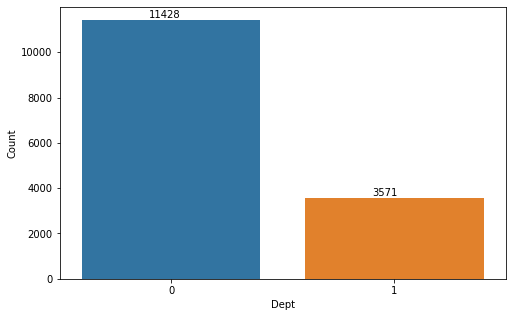

In [92]:
#hr['left'].value_counts().plot(kind='barh')
#ax = sns.countplot(x='left',data=hr)
#plt.show()
plt.figure(figsize=(8,5))
ax = sns.countplot(x='left',data=hr)
plt.xlabel('Dept')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+100))
#print(hr.left.value_counts())

In [93]:
exist_emp = hr.loc[(hr["left"] == 0)]
left_emp = hr.loc[(hr["left"] == 1)]
#left_emp[["satisfaction_level","time_spend_company"]]

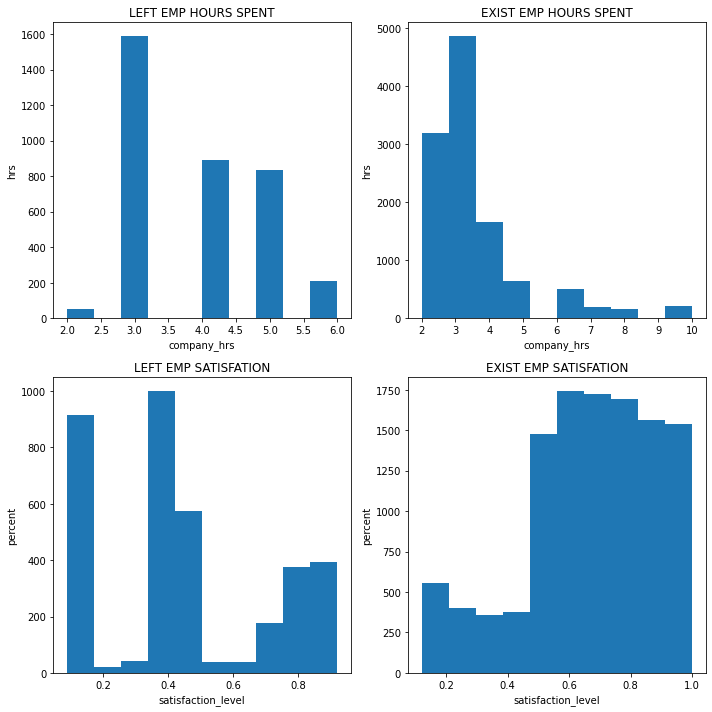

In [94]:
data = [left_emp['company_hrs'],exist_emp['company_hrs'],left_emp['satisfaction_level'],exist_emp['satisfaction_level']]
xaxes = ['company_hrs','company_hrs','satisfaction_level','satisfaction_level']
yaxes = ['hrs','hrs','percent','percent']
titles = ['LEFT EMP HOURS SPENT','EXIST EMP HOURS SPENT','LEFT EMP SATISFATION','EXIST EMP SATISFATION']

f,a = plt.subplots(2,2,figsize=(10, 10))
a = a.ravel()
for x,ax in enumerate(a):
    ax.hist(data[x])
    ax.set_title(titles[x])
    ax.set_xlabel(xaxes[x])
    ax.set_ylabel(yaxes[x])
plt.tight_layout()

In [95]:
print("LEFT EMP",left_emp[["satisfaction_level","company_hrs"]].describe())
print("CURRENT EMP",exist_emp[["satisfaction_level","company_hrs"]].describe())

LEFT EMP        satisfaction_level  company_hrs
count         3571.000000  3571.000000
mean             0.440098     3.876505
std              0.263933     0.977698
min              0.090000     2.000000
25%              0.130000     3.000000
50%              0.410000     4.000000
75%              0.730000     5.000000
max              0.920000     6.000000
CURRENT EMP        satisfaction_level   company_hrs
count        11428.000000  11428.000000
mean             0.666810      3.380032
std              0.217104      1.562348
min              0.120000      2.000000
25%              0.540000      2.000000
50%              0.690000      3.000000
75%              0.840000      4.000000
max              1.000000     10.000000


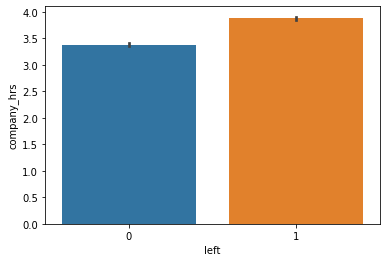

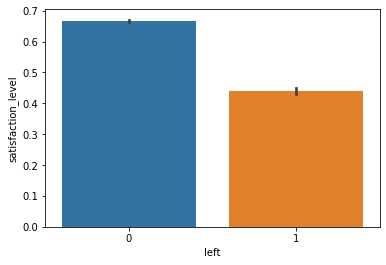

In [96]:
sns.barplot(x=hr["left"], y=hr["company_hrs"])
plt.show()
sns.barplot(x=hr["left"], y=hr["satisfaction_level"])
plt.show()

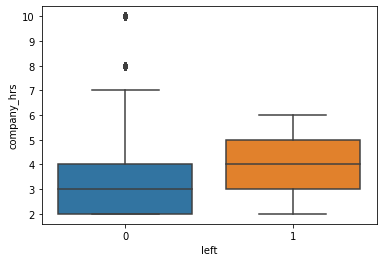

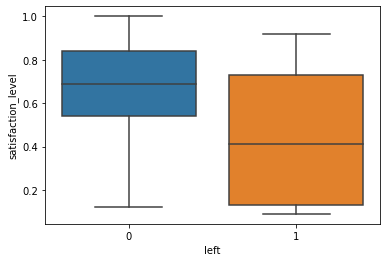

In [97]:
sns.boxplot(x=hr["left"], y=hr["company_hrs"])
plt.show()
sns.boxplot(x=hr["left"], y=hr["satisfaction_level"])
plt.show()

OBSERVATION:

1. The Employees exit has relationship between the number of hours spent in company and satisfactory level of the employee.
2. From the data provided from 14999, 11428 are current employees and 3571 are ex employees of company. 
2. The Ex employees have spent more amount of time and have satisfactory level below the current employees comparitively.

Effect of satisfaction level, department,  promotion in  last 5 years and salary  level  on exit of employees.

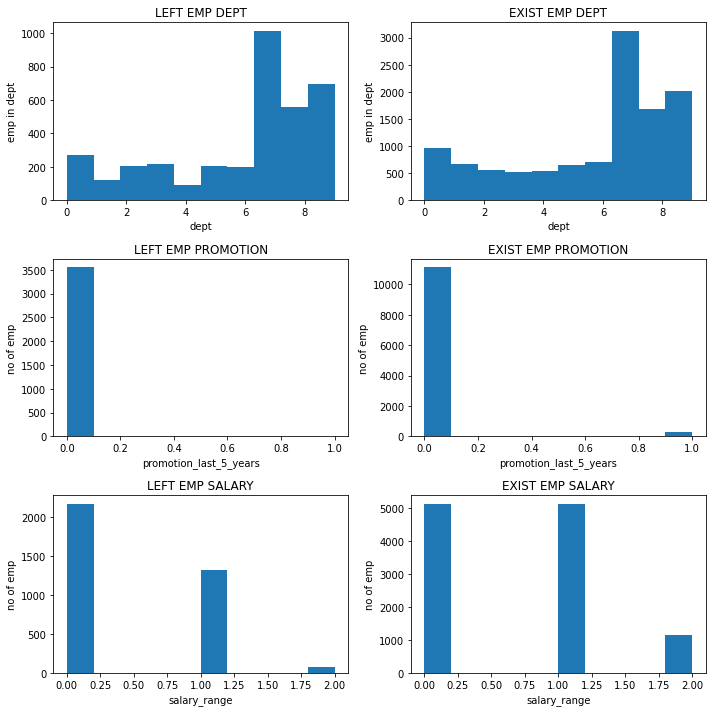

In [98]:
data = [left_emp['dept'],exist_emp['dept'],left_emp['promotion'],exist_emp['promotion'],left_emp['salary'],exist_emp['salary']]
xaxes = ['dept','dept','promotion_last_5_years','promotion_last_5_years','salary_range','salary_range']
yaxes = ['emp in dept','emp in dept','no of emp','no of emp','no of emp','no of emp']
titles = ['LEFT EMP DEPT','EXIST EMP DEPT','LEFT EMP PROMOTION','EXIST EMP PROMOTION','LEFT EMP SALARY','EXIST EMP SALARY']

f,a = plt.subplots(3,2,figsize=(10, 10))
a = a.ravel()
for x,ax in enumerate(a):
    ax.hist(data[x])
    ax.set_title(titles[x])
    ax.set_xlabel(xaxes[x])
    ax.set_ylabel(yaxes[x])
plt.tight_layout()

In [99]:
print("LEFT EMP",left_emp[["dept","promotion","salary"]].describe())
print("CURRENT EMP",exist_emp[["dept","promotion","salary"]].describe())

LEFT EMP               dept    promotion       salary
count  3571.000000  3571.000000  3571.000000
mean      6.035284     0.005321     0.414730
std       2.806633     0.072759     0.537341
min       0.000000     0.000000     0.000000
25%       4.000000     0.000000     0.000000
50%       7.000000     0.000000     0.000000
75%       8.000000     0.000000     1.000000
max       9.000000     1.000000     2.000000
CURRENT EMP                dept     promotion        salary
count  11428.000000  11428.000000  11428.000000
mean       5.819041      0.026251      0.650945
std        2.886126      0.159889      0.655277
min        0.000000      0.000000      0.000000
25%        4.000000      0.000000      0.000000
50%        7.000000      0.000000      1.000000
75%        8.000000      0.000000      1.000000
max        9.000000      1.000000      2.000000


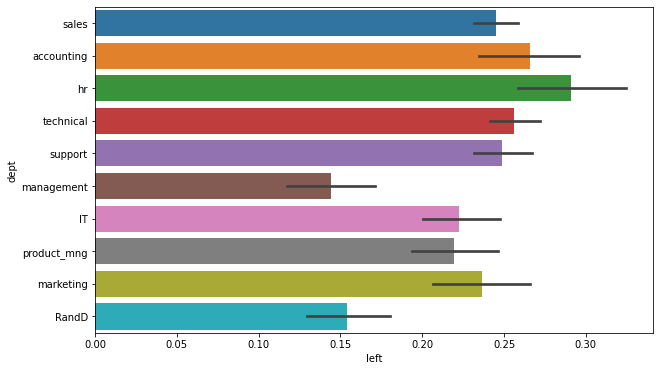

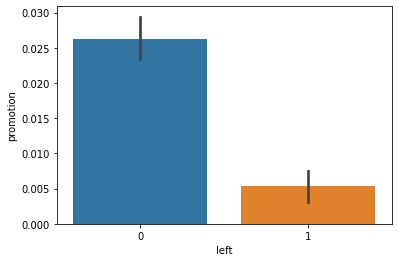

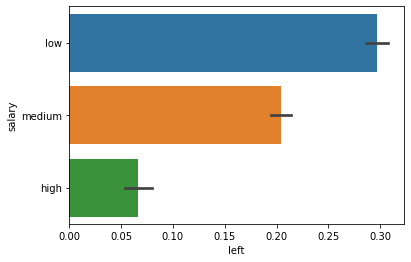

In [100]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x=hr_data["left"],y=hr_data["dept"])
plt.show()
sns.barplot(x=hr_data["left"],y=hr_data["promotion"])
plt.show()
sns.barplot(x=hr_data["left"],y=hr_data["salary"])
plt.show()


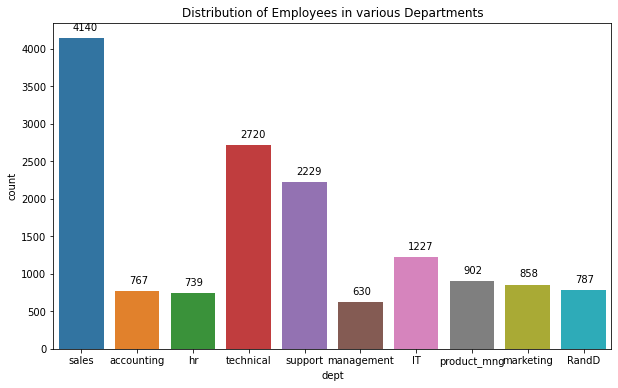

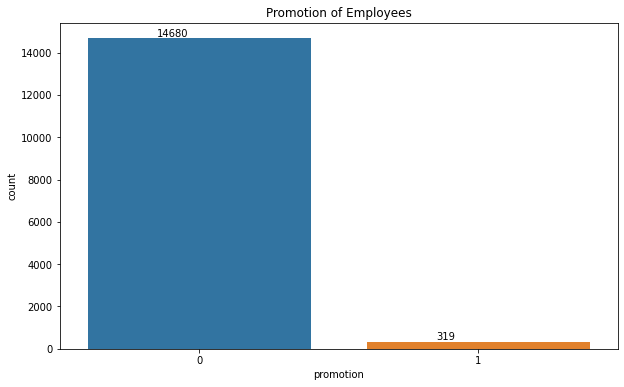

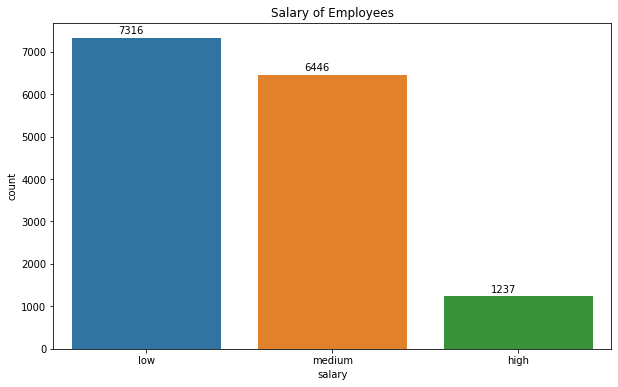

In [101]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='dept',data=hr_data)
plt.title('Distribution of Employees in various Departments')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+100))
plt.figure(figsize=(10,6))
ax = sns.countplot(x='promotion',data=hr_data)
plt.title('Promotion of Employees')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+100))
plt.figure(figsize=(10,6))
ax = sns.countplot(x='salary',data=hr_data)
plt.title('Salary of Employees')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+100))

In [102]:
ex = hr_data.loc[(hr_data["left"] == 1)]
cur = hr_data.loc[(hr_data["left"] == 0)]

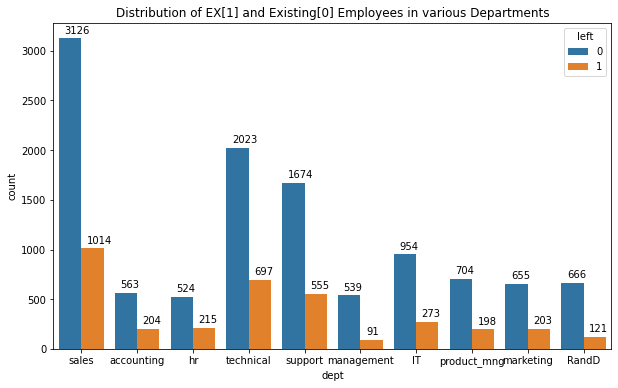

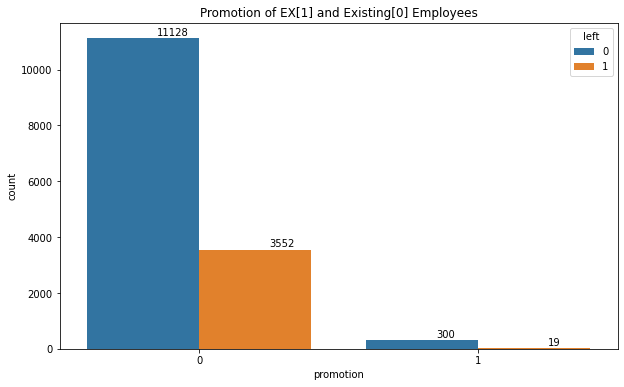

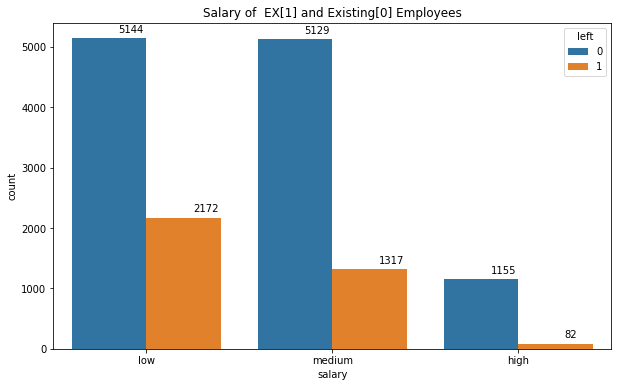

In [103]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='dept',hue='left',data=hr_data)
plt.title('Distribution of EX[1] and Existing[0] Employees in various Departments')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.10, p.get_height()+50))
plt.figure(figsize=(10,6))
ax = sns.countplot(x='promotion',hue='left',data=hr_data)
plt.title('Promotion of EX[1] and Existing[0] Employees')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+100))
plt.figure(figsize=(10,6))
ax = sns.countplot(x='salary',hue='left',data=hr_data)
plt.title('Salary of  EX[1] and Existing[0] Employees')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+100))


OBSERVATIONS:
1. The Promotion given to employees is comparitively very low(319 out of 14999) so they do have impact on the exit of employees.
2. The Low Salary range is comparitively larger for ex employees. The number of current employees cumulatively in medium and high range forms 42% of total data.
3. More employees from HR department has left company and maximum numberof employeesis found in sales department

In [104]:
#BUILD DECISION TREE CLASSIFIER MODEL

In [105]:
#dept is in numerical value due to LabelEncoder, 
#But algorithms will consider numerical value with higher value as more important but it is not so for dept.
hr = hr.drop("dept",axis=1)


SPLIT INTO TRAIN AND TEST DATASET

In [106]:

y = hr.left
hr = hr.drop("left",axis=1)

X = hr


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

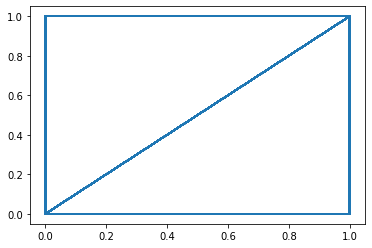

In [108]:
plt.plot(y_pred,y_test)

In [109]:
print(dtc.feature_importances_) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[5.04985845e-01 1.56178777e-01 1.02741757e-01 8.93414705e-02
 1.39467391e-01 1.30137790e-03 1.79416617e-05 5.96544015e-03]
Accuracy: 0.9766666666666667
Precision: 0.9399454049135578
Recall: 0.9636194029850746


In [110]:
#BUILD SVM CLASSIFIER MODEL

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=10)
svmc = SVC(kernel='linear')
svmc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

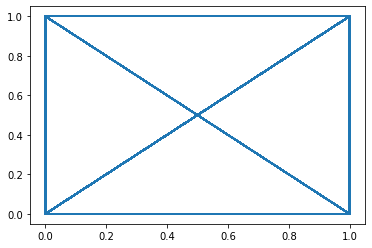

In [112]:
y_pred_svm = svmc.predict(X_test)
plt.plot(y_pred_svm,y_test)

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.7855555555555556
Precision: 0.6377440347071583
Recall: 0.2692307692307692


OBSERVATIONS:

1.The Decision tree classifier has higher accuracy rate when compared to SVM model. 
2.The Prediction rate on exit of employees is 97.67% in Decision tree classifier.